In [1]:
import sep
from astropy.io import fits
from astropy.modeling import rotations
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy import units as u
%matplotlib inline

In [2]:
f105w = download_file('https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
hdul = fits.open(f105w)
data = hdul[0].data
hdul.info()
hdul.close()

Filename: C:\Users\hitom\AppData\Local\Temp\tmpq76ckczo
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


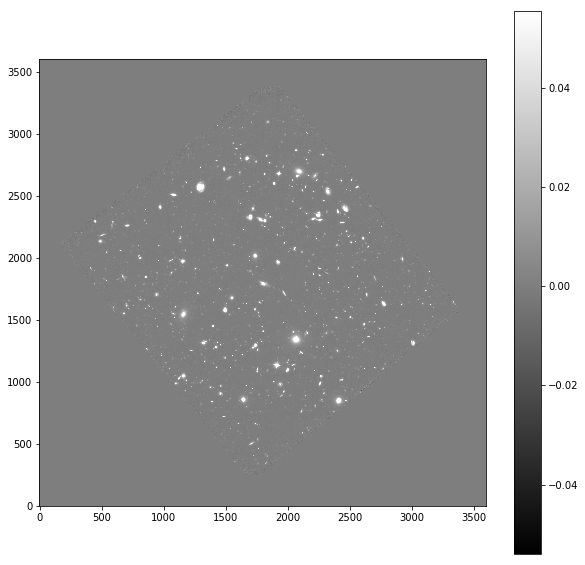

In [3]:
m, s = np.mean(data), np.std(data)
plt.figure(figsize=(10,10))
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [4]:
data = data.byteswap(inplace=True).newbyteorder()
bkg = sep.Background(data, bw=16, bh=16)

In [5]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005099902045913041


In [6]:
bkg_f105w = bkg.back()

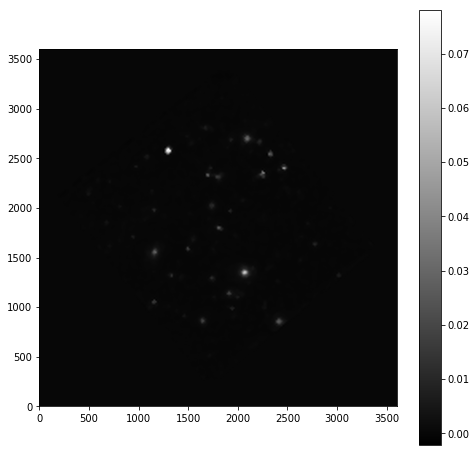

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_f105w, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [8]:
bkg_rms = bkg.rms()

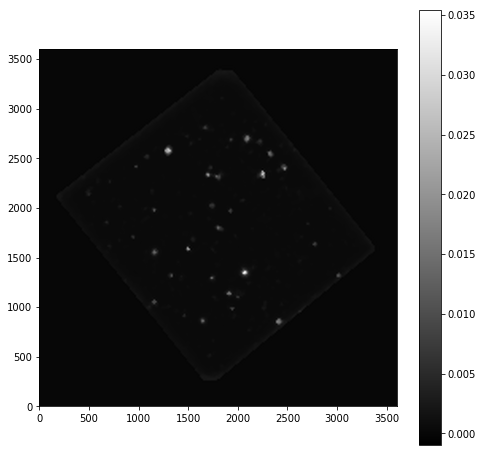

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [10]:
data_sub = data - bkg

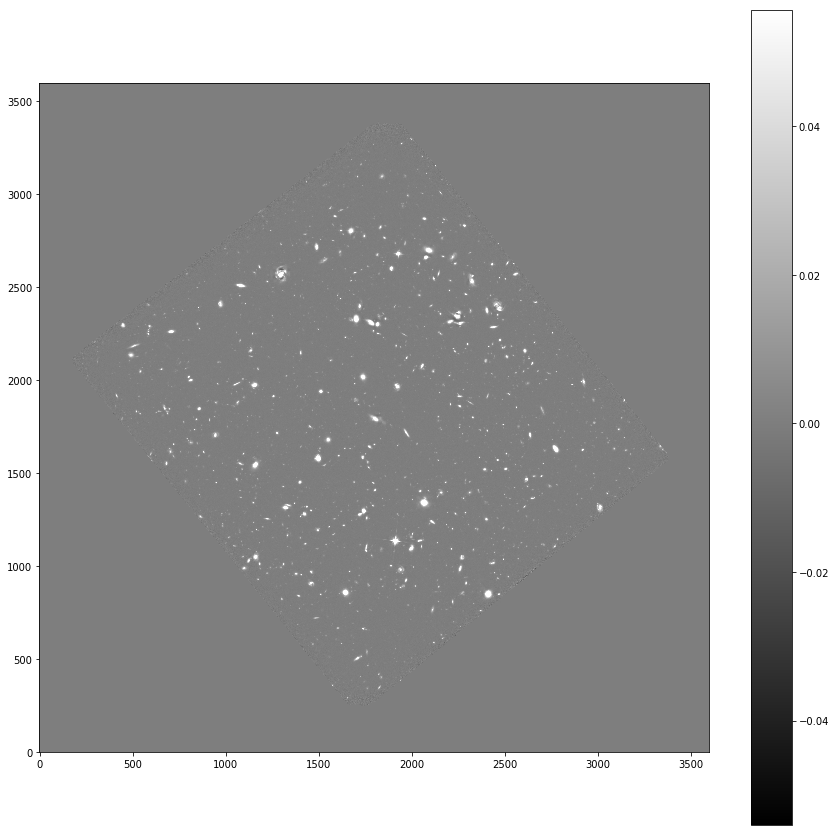

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

In [12]:
msk = data<=0.02
objects = sep.extract(data_sub, 3, err=bkg.globalrms, mask=msk)

In [13]:
len(objects)

810

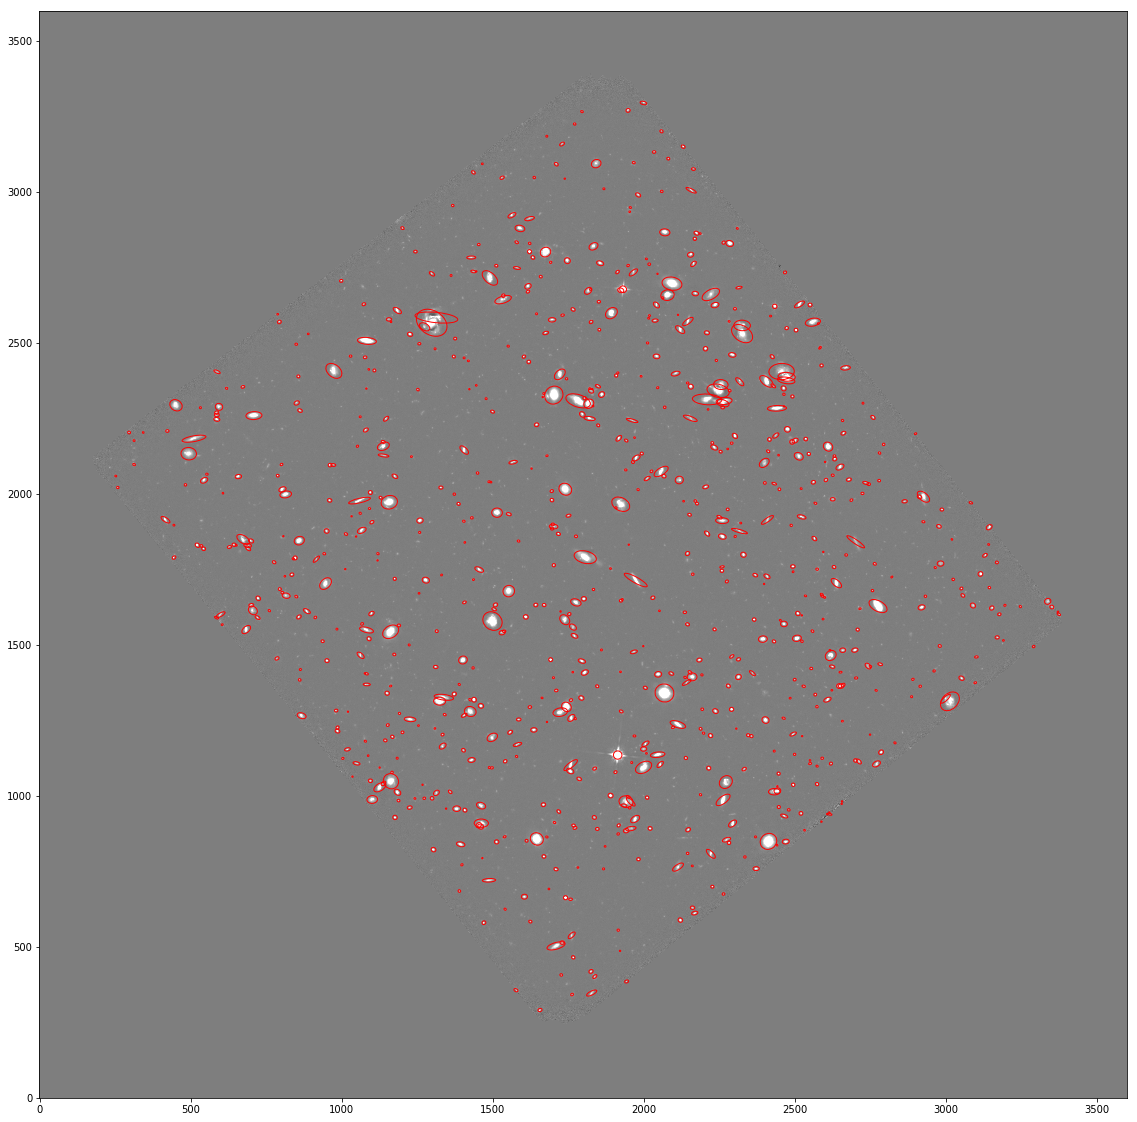

In [14]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(20,20))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=8*objects['a'][i],height=8*objects['b'][i],angle=objects['theta'][i]*180/(2*np.pi))
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [15]:
flux, fluxerr, flag = sep.sum_circle(data_sub,objects['x'],objects['y'],3.0,err=bkg.globalrms,mask=msk, gain=1.0)

In [16]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,flux[i],fluxerr[i]))

object 0: flux = 1.247050 +/- 1.116717
object 1: flux = 0.686795 +/- 0.828735
object 2: flux = 1.114998 +/- 1.055938
object 3: flux = 1.217056 +/- 1.103206
object 4: flux = 0.899049 +/- 0.948186
object 5: flux = 0.823192 +/- 0.907303
object 6: flux = 0.761383 +/- 0.872577
object 7: flux = 1.263850 +/- 1.124214
object 8: flux = 1.067958 +/- 1.033424
object 9: flux = 0.571732 +/- 0.756134


In [17]:
for i in range(810):
    Mags = {}
    Mags[i] = u.Magnitude(flux[i])
    print(Mags)

{0: <Magnitude 1.24705008 mag>}
{1: <Magnitude 0.68679456 mag>}
{2: <Magnitude 1.11499831 mag>}
{3: <Magnitude 1.21705583 mag>}
{4: <Magnitude 0.89904862 mag>}
{5: <Magnitude 0.82319183 mag>}
{6: <Magnitude 0.76138266 mag>}
{7: <Magnitude 1.26384954 mag>}
{8: <Magnitude 1.0679583 mag>}
{9: <Magnitude 0.57173152 mag>}
{10: <Magnitude 3.18421469 mag>}
{11: <Magnitude 0.83105919 mag>}
{12: <Magnitude 1.0527996 mag>}
{13: <Magnitude 0.67878291 mag>}
{14: <Magnitude 1.43656543 mag>}
{15: <Magnitude 0.85556561 mag>}
{16: <Magnitude 2.2282096 mag>}
{17: <Magnitude 1.21308372 mag>}
{18: <Magnitude 0.6362079 mag>}
{19: <Magnitude 0.80476338 mag>}
{20: <Magnitude 0.640895 mag>}
{21: <Magnitude 8.20261571 mag>}
{22: <Magnitude 1.29652715 mag>}
{23: <Magnitude 0.66673601 mag>}
{24: <Magnitude 0.7499287 mag>}
{25: <Magnitude 0.59049103 mag>}
{26: <Magnitude 0.94978142 mag>}
{27: <Magnitude 1.41938108 mag>}
{28: <Magnitude 0.67708784 mag>}
{29: <Magnitude 1.08661626 mag>}
{30: <Magnitude 0.58598227 

{635: <Magnitude 0.57061031 mag>}
{636: <Magnitude 0.53382875 mag>}
{637: <Magnitude 17.7278287 mag>}
{638: <Magnitude 0.62149033 mag>}
{639: <Magnitude 0.62950575 mag>}
{640: <Magnitude 1.49328862 mag>}
{641: <Magnitude 0.76538213 mag>}
{642: <Magnitude 0.64164943 mag>}
{643: <Magnitude 0.98388969 mag>}
{644: <Magnitude 5.65004303 mag>}
{645: <Magnitude 0.88098355 mag>}
{646: <Magnitude 0.65353642 mag>}
{647: <Magnitude 6.4213974 mag>}
{648: <Magnitude 2.75573636 mag>}
{649: <Magnitude 0.96537278 mag>}
{650: <Magnitude 0.58590137 mag>}
{651: <Magnitude 0.63387665 mag>}
{652: <Magnitude 6.26633174 mag>}
{653: <Magnitude 1.08975773 mag>}
{654: <Magnitude 1.37970232 mag>}
{655: <Magnitude 0.63247454 mag>}
{656: <Magnitude 1.20338999 mag>}
{657: <Magnitude 0.68462693 mag>}
{658: <Magnitude 3.85263272 mag>}
{659: <Magnitude 1.04635522 mag>}
{660: <Magnitude 0.57202614 mag>}
{661: <Magnitude 1.73088204 mag>}
{662: <Magnitude 3.96778127 mag>}
{663: <Magnitude 4.11409039 mag>}
{664: <Magnitud

In [18]:
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 3600 / Axis length                                    
NAXIS2  =                 3600 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
IRAF-TLM= '2012-12-04T19:12:18' / Time of last modification                     
FILENAME= 'hlsp_candels_hst_hst_hudf12_wfc3ir_f105w_60mas' / MAST HLSP FileName 
OBJECT  = 'HLSP_HUDF12_HST_WFC3IR_UDFMAIN_F105W_60MAS_V1.0_DRZ[1/1]'            
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2012-12-04T19:09:11'                                                 
IRAF-MAX=           7.444648E1  /  DATA MAX                                     
IRAF-MIN=         -9.047293E

In [19]:
# Slice the data into 1296 sections of 100 x 100 arrays and place them into a dictionary
ndata = {}
for i in range(36):
    for n in range(36):
        ndata[36*i + n] = data[100*i:100*i+100:1,100*n:100*n+100:1]

In [20]:
# Convert the dictionary to a list
adata = np.array(list(ndata.values()))

In [21]:
ndata_sub = {}
grms = {}
gback = {}
for i in range(1296):
    # Subtract the background from each element in the adata list and place it in a dictionary
    ndata_sub[i] = adata[i] - sep.Background(adata[i], bw=32, bh=32)
    
    # Create a dict of all of the global rms values
    grms[i] = sep.Background(adata[i], bw=32, bh=32).globalrms
    
    # Create a dict of all of the global background values
    gback[i] = sep.Background(adata[i], bw=32, bh=32).globalback

# Convert the dict to a list
adata_sub = np.array(list(ndata_sub.values()))

In [22]:
agback = np.array(list(gback.values()))

In [23]:
# Convert the grms dict into a list, then take the average of all of the relevant grms values
agrms = np.array(list(grms.values()))
u = 0
for i in range(1296):
    if(agrms[i]==1):
        u += 1
    else:
        continue
Avg_agrms = (sum(agrms)-u)/(1296-u)

In [24]:
# Place the raw sep.extract data into the sxt dict and the len(sep.extract) data into an objects dict
objects = {}
sxt = {}
for i in range(1296):
    v = np.exp(agrms[i]/Avg_agrms)
    print(i,'\t',v)
    q = sep.extract(adata_sub[i], v, err=sep.Background(adata[i], bw=32, bh=32).globalrms)
    sxt[i] = sep.extract(adata_sub[i], v, err=sep.Background(adata[i], bw=32, bh=32).globalrms)
    if(len(q)>30):
        q = sep.extract(adata_sub[i], 30*v, err=sep.Background(adata[i], bw=32, bh=32).globalrms)
    objects[i] = len(q)

C:\Users\hitom\Anaconda3\envs\bash\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


0 	 inf
1 	 inf
2 	 inf
3 	 inf
4 	 inf
5 	 inf
6 	 inf
7 	 inf
8 	 inf
9 	 inf
10 	 inf
11 	 inf
12 	 inf
13 	 inf
14 	 inf
15 	 inf
16 	 inf
17 	 inf
18 	 inf
19 	 inf
20 	 inf
21 	 inf
22 	 inf
23 	 inf
24 	 inf
25 	 inf
26 	 inf
27 	 inf
28 	 inf
29 	 inf
30 	 inf
31 	 inf
32 	 inf
33 	 inf
34 	 inf
35 	 inf
36 	 inf
37 	 inf
38 	 inf
39 	 inf
40 	 inf
41 	 inf
42 	 inf
43 	 inf
44 	 inf
45 	 inf
46 	 inf
47 	 inf
48 	 inf
49 	 inf
50 	 inf
51 	 inf
52 	 inf
53 	 inf
54 	 inf
55 	 inf
56 	 inf
57 	 inf
58 	 inf
59 	 inf
60 	 inf
61 	 inf
62 	 inf
63 	 inf
64 	 inf
65 	 inf
66 	 inf
67 	 inf
68 	 inf
69 	 inf
70 	 inf
71 	 inf
72 	 inf
73 	 inf
74 	 inf
75 	 inf
76 	 inf
77 	 inf
78 	 inf
79 	 inf
80 	 inf
81 	 inf
82 	 inf
83 	 inf
84 	 inf
85 	 inf
86 	 inf
87 	 inf
88 	 14.753468545284266
89 	 3.4250330770680404
90 	 10.47563468338378
91 	 inf
92 	 inf
93 	 inf
94 	 inf
95 	 inf
96 	 inf
97 	 inf
98 	 inf
99 	 inf
100 	 inf
101 	 inf
102 	 inf
103 	 inf
104 	 inf
105 	 inf
106 	 

551 	 5.509633680122342
552 	 2.4354720247699726
553 	 2.0795442245556877
554 	 2.2130081465395497
555 	 2.3545682915770887
556 	 2.0836892838892576
557 	 2.2834192484779456
558 	 2.0911428806301764
559 	 2.0971532224068303
560 	 2.0726419378121825
561 	 2.0853386747622924
562 	 2.1331725383576123
563 	 2.1808672632279054
564 	 2.3387132016372254
565 	 2.375071076116997
566 	 2.1403500774703765
567 	 2.2335660612088635
568 	 2.049218964853637
569 	 2.154179553785479
570 	 2.134535902945905
571 	 2.166100067367133
572 	 2.9887573742033906
573 	 7.10574253212469
574 	 inf
575 	 inf
576 	 inf
577 	 inf
578 	 inf
579 	 inf
580 	 8.334848658763665
581 	 2.93790332227826
582 	 2.5412197167772477
583 	 2.365102791891369
584 	 2.141872601920704
585 	 2.1316818704579727
586 	 1.982462761642119
587 	 2.196895018813696
588 	 2.2257134331109563
589 	 2.1150459075367656
590 	 2.171512251900189
591 	 2.9721284880426615
592 	 2.22053313941414
593 	 2.1216576551394977
594 	 2.1085956601618414
595 	 2.

970 	 inf
971 	 inf
972 	 inf
973 	 inf
974 	 inf
975 	 inf
976 	 inf
977 	 inf
978 	 inf
979 	 inf
980 	 inf
981 	 11.546777809256962
982 	 4.513167159405855
983 	 2.6157311213139653
984 	 2.2087819097532644
985 	 2.1334986769998876
986 	 2.67173956572884
987 	 2.2714095275496216
988 	 4.049830077717019
989 	 2.197853827713069
990 	 2.205906319750569
991 	 2.4798150402074257
992 	 2.4901602737462976
993 	 2.397557868908553
994 	 2.218600144538993
995 	 3.211098450996926
996 	 5.055143219815812
997 	 inf
998 	 inf
999 	 inf
1000 	 inf
1001 	 inf
1002 	 inf
1003 	 inf
1004 	 inf
1005 	 inf
1006 	 inf
1007 	 inf
1008 	 inf
1009 	 inf
1010 	 inf
1011 	 inf
1012 	 inf
1013 	 inf
1014 	 inf
1015 	 inf
1016 	 inf
1017 	 inf
1018 	 9.023188539480957
1019 	 5.379459909956112
1020 	 2.8139646093252626
1021 	 2.244248096593022
1022 	 2.119127073720535
1023 	 2.2903420168402278
1024 	 2.236488361284882
1025 	 2.379757713477775
1026 	 2.206279072082286
1027 	 2.155412020050766
1028 	 2.11905584419

In [25]:
# Convert objects dict into list
aobjects = np.array(list(objects.values()))

In [26]:
# Problematic slices
for i in range(1296):
    if(aobjects[i]>=25):
        print(i,'\t',aobjects[i])

350 	 26
475 	 33
536 	 39
651 	 38
820 	 46
944 	 61
1205 	 78
1207 	 91


In [130]:
dflux = {}
dfluxerr = {}
dflag = {}

for n in range(1296):
    dflux[n], dfluxerr[n], dflag[n] = sep.sum_circle(adata_sub[n],sxt[n]['x'],sxt[n]['y'],3.0,err=agrms[n], gain=1.0)

aflux = np.array(list(dflux.values()))
afluxerr = np.array(list(dfluxerr.values()))
aflag = np.array(list(dflag.values()))

1950


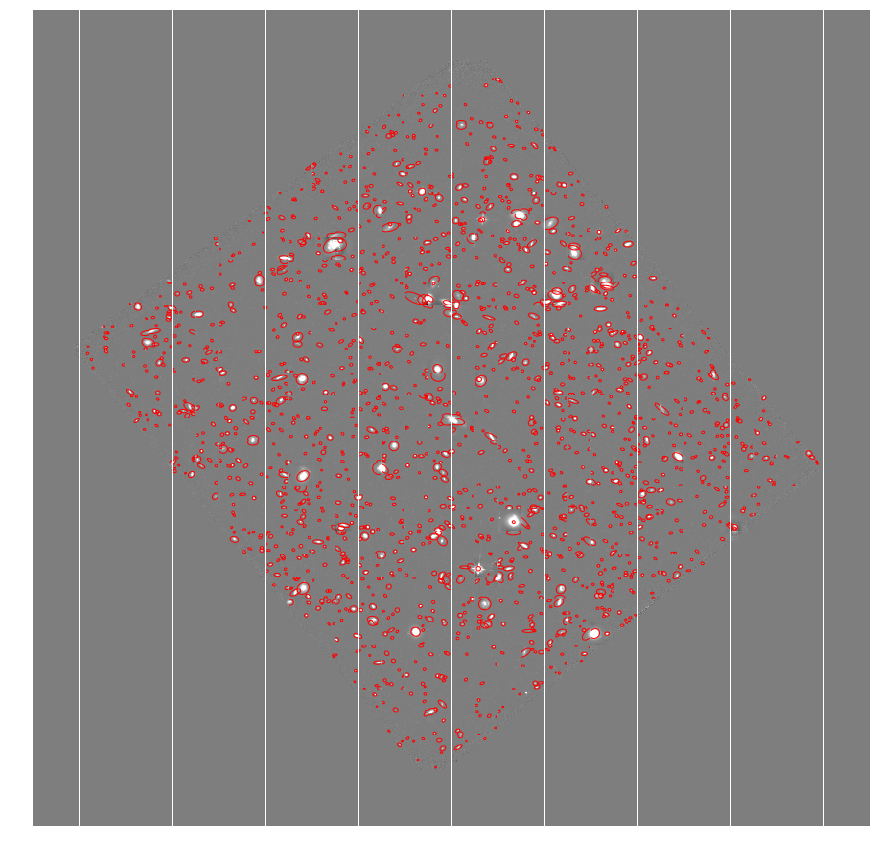

In [181]:
# Plot all of the background subtracted slices with ellipses around the objects
from matplotlib.patches import Ellipse

im = {}
fig, ax = plt.subplots(ncols=36, nrows=36, figsize=(15,15))
fig.subplots_adjust(hspace=0, wspace=0)
w = 0
z = 0
no = 0
m, s = np.mean(data_sub), np.std(data_sub)
for n in range(1296):
    im[n] = ax[35-z,w].imshow(adata_sub[n], interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
    ax[35-z,w].axis('off')
    
    if(aobjects[n]>=25):
        if(w==35):
            w = 0
            z += 1
        else:
            w += 1
    else:
        for i in range(aobjects[n]):
            try:
                if(aflux[n][i]<=0.1):
                    continue
                else:
                    try:
                        e = Ellipse(xy=(sxt[n]['x'][i], sxt[n]['y'][i]),width=6*sxt[n]['a'][i],height=6*sxt[n]['b'][i],\
                                    angle=sxt[n]['theta'][i]*180/(2*np.pi))
                    except:
                        continue
                    e.set_facecolor('none')
                    e.set_edgecolor('red')
                    ax[35-z,w].add_artist(e)
                    no += 1
            except:
                try:
                    e = Ellipse(xy=(sxt[n]['x'][i], sxt[n]['y'][i]),width=6*sxt[n]['a'][i],height=6*sxt[n]['b'][i],\
                                angle=sxt[n]['theta'][i]*180/(2*np.pi))
                except:
                    continue
                e.set_facecolor('none')
                e.set_edgecolor('red')
                ax[35-z,w].add_artist(e)
                no += 1
        if(w==35):
            w = 0
            z += 1
        else:
            w += 1
print(no)

### There are 1950 objects in this image, with uncertainty due to high noise around the border and the same objects being detected multiple times on slice boundaries.

## Aperature Photometry

In [ ]:
fluxes = np.concatenate(aflux)
fluxerrs = np.concatenate(afluxerr)
flags = np.concatenate(aflag)

In [137]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,fluxes[i],fluxerrs[i]))

object 0: flux = 1.144589 +/- 1.069895
object 1: flux = 0.029425 +/- 0.171590
object 2: flux = 0.082352 +/- 0.287001
object 3: flux = 0.039477 +/- 0.198732
object 4: flux = 0.105575 +/- 0.324951
object 5: flux = 0.055043 +/- 0.234651
object 6: flux = 0.042755 +/- 0.206815
object 7: flux = 0.032426 +/- 0.180123
object 8: flux = 0.069201 +/- 0.263096
object 9: flux = 0.017933 +/- 0.133983


In [178]:
print('Fluxes: ',len(fluxes))
print('Objects:',np.sum(aobjects))

Fluxes:  5092
Objects: 5071


(array([4.678e+03, 7.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

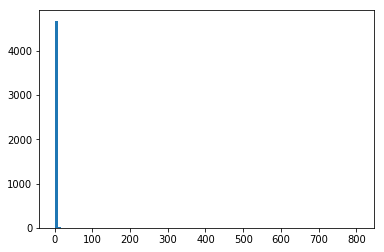

In [100]:
from astropy import visualization as vis

# supposed to have ~1950 bins, but the outlier at the array's start makes it impossible
vis.hist(fluxes,100)